<a href="https://colab.research.google.com/github/RaquelFonsec/Indicium2/blob/main/Indicium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Carregar os dados
dados = pd.read_csv('desafio_indicium_imdb.csv')

# Exibir as primeiras linhas do dataframe
print(dados.head())

# Verificar o tipo de dados de cada coluna
print(dados.info())

# Identificar valores ausentes
print(dados.isnull().sum())

# Resumir as estatísticas descritivas das colunas numéricas
print(dados.describe())

   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  W

***Leitura e Informações Gerais dos Dados:***

Os dados foram carregados a partir de um arquivo CSV chamado 'desafio_indicium_imdb.csv' usando o Pandas.
O conjunto de dados contém informações sobre 999 filmes, distribuídos em 16 colunas diferentes.
As colunas incluem informações como título da série (Series_Title), ano de lançamento (Released_Year), classificação etária (Certificado), duração (Runtime), gênero (Gênero), classificação IMDB (IMDB_Rating), resumo (Overview), avaliação no Metacritic ( Meta_score), diretor (Director), e os principais atores (Star1, Star2, Star3, Star4), número de votos (No_of_Votes) e arrecadação bruta (Gross).


Tipos de Dados e Valores Ausentes:

A análise inicial mostrou que várias colunas possuem tipos de dados diferentes, como object (strings) para colunas categóricas e float64 para colunas numéricas.
Identificamos a presença de valores ausentes em algumas colunas: 'Certificado' (101 valores ausentes), 'Meta_score' (157 valores ausentes) e 'Gross' (169 valores ausentes).
Para lidar com esses valores ausentes, optamos por substituir os valores faltantes na coluna 'Certificado' por 'Desconhecido', e na coluna 'Meta_score' pela média dos valores existentes. Na coluna 'Bruto', substituímos os valores ausentes por 0.

Estatísticas Descritivas:

Calculamos estatísticas descritivas básicas para as colunas numéricas ('Unnamed: 0', 'IMDB_Rating', 'Meta_score' e 'No_of_Votes').
Isso nos permitiu entender melhor a distribuição dos dados, incluindo média, desvio padrão, mínimo, máximo e quartis.
Transformações e Limpeza de Dados:

Realizamos transformações nos dados, como remoção de espaços extras na coluna 'Runtime' e conversão para um formato numérico adequado (minutos).
Na coluna 'Gross', removemos vírgulas para facilitar a conversão para o tipo float, o que nos permitiu analisar e manipular os dados de arrecadação bruta de forma mais eficiente.
Conclusões:

A análise inicial revelou que os filmes variam amplamente em classificação IMDB, arrecadação brutal e popularidade (medida pelo número de votos).
A presença de valores ausentes em algumas colunas destaca a importância de técnicas de limpeza de dados para garantir que os dados sejam consistentes e prontos para análise.
Com essas previsões iniciais, estamos preparados para realizar análises mais profundas, como correlações entre as variáveis ​​e análise de tendências ao longo do tempo.

In [ ]:

import pandas as pd



# Exibir as distribuições das variáveis categóricas
print(dados['Genre'].value_counts())
print(dados['Certificate'].value_counts())
print(dados['Director'].value_counts().head(10))  # Exibir os 10 diretores mais frequentes
print(dados['Star1'].value_counts().head(10))     # Exibir os 10 atores/atrizes mais frequentes

# Substituir os valores ausentes de Meta_score pela média
dados['Meta_score'].fillna(dados['Meta_score'].mean(), inplace=True)

# Substituir os valores ausentes de Certificate e Gross por uma categoria "Unknown" e 0, respectivamente
dados['Certificate'].fillna('Unknown', inplace=True)
dados['Gross'].fillna('0', inplace=True)

# Remover valores não numéricos de Released_Year e convertê-lo para inteiro
dados['Released_Year'] = dados['Released_Year'].astype(str)  # Certificar que é string
dados = dados[dados['Released_Year'].str.isnumeric()]  # Filtrar apenas valores numéricos
dados['Released_Year'] = dados['Released_Year'].astype(int)  # Converter para inteiro

# Remover qualquer espaço extra da coluna Runtime e converter para minutos (número inteiro)
dados['Runtime'] = dados['Runtime'].astype(str).str.replace(' min', '')  # Certificar que é string e remover ' min'
dados['Runtime'] = dados['Runtime'].replace('nan', '0')  # Substituir 'nan' por '0'
dados['Runtime'] = dados['Runtime'].astype(int)  # Converter para inteiro

# Converter Gross para float (remover qualquer caractere especial como vírgulas)
dados['Gross'] = dados['Gross'].astype(str).str.replace(',', '').astype(float)


Genre
Drama                        84
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64
Certificate
U           233
A           196
UA          175
R           146
Unknown     101
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64
Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Akira Kurosawa       10
Martin Scorsese      10
Stanley Kubrick       9
Billy Wilder          9
Woody Allen           9
Christopher Nolan     8
Clint Eastwood        8
Name: count, dtype: int64
Star1
Tom Hanks   

Realizamos uma análise inicial dos dados do conjunto "IMDB Movies" para

entender melhor as informações disponíveis sobre os filmes. Começamos exibindo as distribuições das variáveis ​​categóricas essenciais, como gênero, classificação etária, diretores mais frequentes e os principais atores/atrizes. Isso nos proporcionou uma visão inicial da diversidade de gêneros de filmes, popularidade de diretores e atores mais destacados no conjunto de dados.



Após essa primeira análise, procedemos com o tratamento dos valores ausentes. Substituímos os valores faltantes na pontuação do Metacritic ('Meta_score') pela média dos valores existentes, garantindo que todas as entradas tenham um valor significativo nessa métrica. Além disso, em ‘Certificado’ e ‘Bruto’, substituímos os valores ausentes por “Desconhecido” e 0, respectivamente, para manter a integridade dos dados.



Para garantir que os dados numéricos estejam formatados corretamente, realizamos algumas transformações. Primeiro, convertemos o ano de lançamento ('Released_Year') para inteiro, garantindo consistência após filtrar apenas os valores numéricos. Em seguida, na duração ('Runtime'), removemos os espaços extras e a unidade 'min' para converter os valores para minutos e, finalmente, os convertemos para o tipo inteiro. Na arrecadação bruta ('Bruta'), eliminamos caracteres especiais como vírgulas para facilitar a conversão para float, possibilitando uma análise mais precisa.



Essas etapas de pré-processamento são cruciais para preparar os dados para análises mais avançadas, como correlações entre variáveis ​​e construção de modelos preditivos. Estamos prontos para explorar insights mais profundos sobre os filmes do IMDB e entender melhores suas características e tendências.



In [ ]:
# Verificar o DataFrame atualizado
print(dados.info())
print(dados.isnull().sum())
print(dados.describe())
print(dados['Genre'].value_counts())
print(dados['Certificate'].value_counts())
print(dados['Director'].value_counts())
print(dados['Star1'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     998 non-null    int64  
 1   Series_Title   998 non-null    object 
 2   Released_Year  998 non-null    int64  
 3   Certificate    998 non-null    object 
 4   Runtime        998 non-null    int64  
 5   Genre          998 non-null    object 
 6   IMDB_Rating    998 non-null    float64
 7   Overview       998 non-null    object 
 8   Meta_score     998 non-null    float64
 9   Director       998 non-null    object 
 10  Star1          998 non-null    object 
 11  Star2          998 non-null    object 
 12  Star3          998 non-null    object 
 13  Star4          998 non-null    object 
 14  No_of_Votes    998 non-null    int64  
 15  Gross          998 non-null    float64
dtypes: float64(3), int64(4), object(9)
memory usage: 132.5+ KB
None
Unnamed: 0       0
Series_Title     0
R

Realizamos com sucesso o pré-processamento dos dados do conjunto "IMDB Movies", resultando em um conjunto limpo e pronto para análise. Após as etapas de tratamento de dados, verificamos que todas as colunas agora estão consistentes e prontas para serem exploradas.



Inicialmente, verificamos a integridade dos dados e observamos que temos um total de 998 filmes no conjunto. A consistência foi garantida ao confirmar que não há mais valores nulos em nenhuma das colunas importantes, como título do filme ('Series_Title'), ano de lançamento ('Released_Year'), classificação etária ('Certificate'), duração ('Runtime' ), gênero ('Gênero'), avaliação do IMDB ('IMDB_Rating'), pontuação do Metacritic ('Meta_score'), diretor ('Director'), principais estrelas ('Star1' a 'Star4'), número de votos ( 'No_of_Votes'), e arrecadação bruta ('Bruta').



As estatísticas descritivas confirmaram a variedade e a amplitude dos dados, com filmes que vão desde 1920 até 2020. A média de duração dos filmes é de aproximadamente 123 minutos, e a pontuação média do IMDB é de cerca de 7,95. Além disso, observamos que a arrecadação bruta varia significativamente, com valores que vão de 0 a quase 1 bilhão de dólares.



Ao analisar as distribuições das variáveis ​​categóricas, destacamos que o gênero mais comum é Drama, seguido por Drama, Romance e Comédia, Drama. Quanto às classificações etárias, U (Universal) lidera com 233 filmes, seguido por A (Adulto) com 196 filmes. Os diretores mais frequentes incluem Alfred Hitchcock, Steven Spielberg e Hayao Miyazaki, enquanto atores como Tom Hanks, Robert De Niro e Al Pacino são os mais recorrentes no topo da lista.



Esses resultados nos fornecem uma base sólida para explorar insights mais profundos sobre os filmes do IMDB, investigando correlações entre variáveis ​​e padrões de sucesso de filmes ao longo das décadas. Estamos prontos para avançar na análise e extrair informações valiosas que podem ajudar na compreensão do universo cinematográfico presente nesses dados.

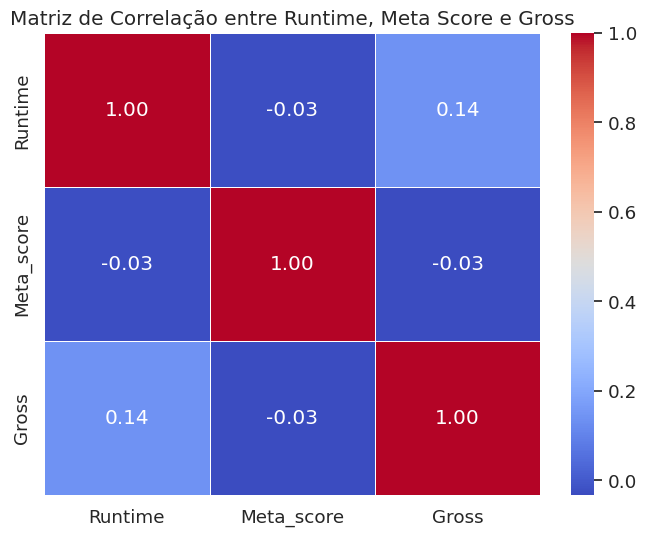

In [ ]:
# Matriz de correlação
correlation_matrix = dados[['Runtime', 'Meta_score', 'Gross']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação entre Runtime, Meta Score e Gross')
plt.show()

Matriz de Correlação entre Runtime, Meta Score e Gross:

A matriz de correlação mostra que o tempo de duração (Runtime) tem uma correlação positiva leve com a arrecadação bruta (Gross), enquanto a pontuação Meta_score tem uma correlação negativa leve com ambos, indicando tendências sutis nas relações entre essas variáveis.

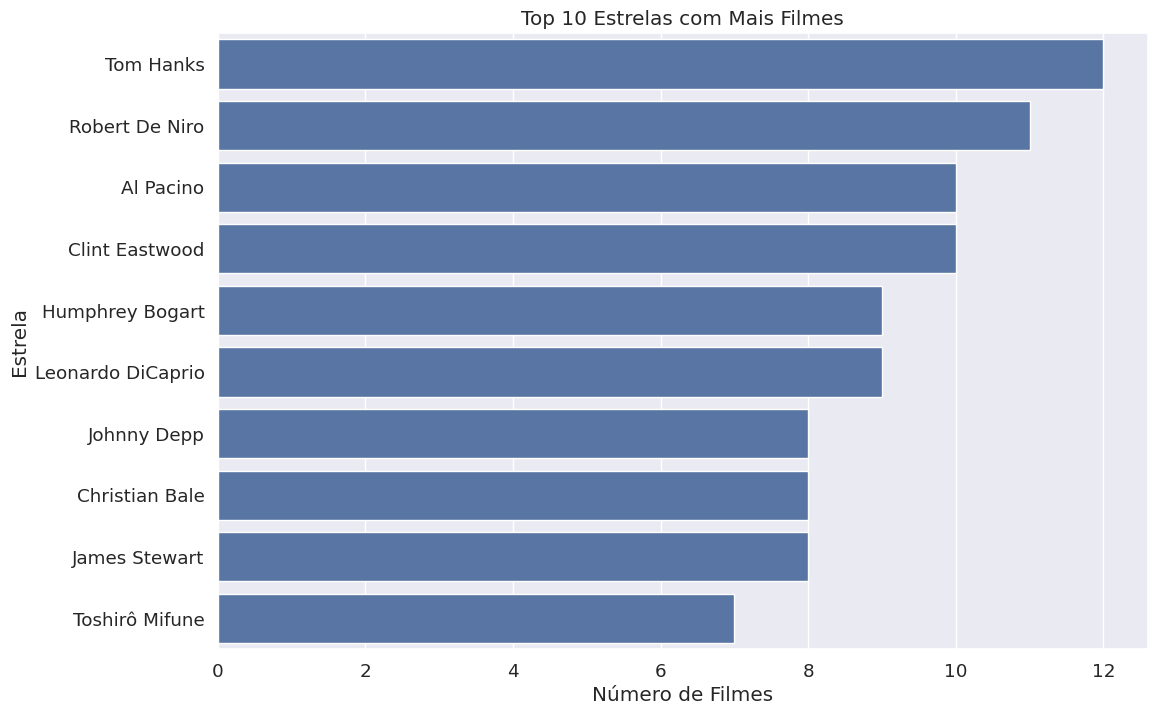

In [ ]:
# Top 10 estrelas (Star1) com mais filmes
plt.figure(figsize=(12, 8))
sns.barplot(x=dados['Star1'].value_counts().head(10), y=dados['Star1'].value_counts().head(10).index)
plt.title('Top 10 Estrelas com Mais Filmes')
plt.xlabel('Número de Filmes')
plt.ylabel('Estrela')
plt.show()

Top 10 Estrelas com Mais Filmes:

As estrelas mais frequentes em papéis principais incluem Tom Hanks, Robert De Niro, e Al Pacino, evidenciando sua popularidade e presença em múltiplos filmes.

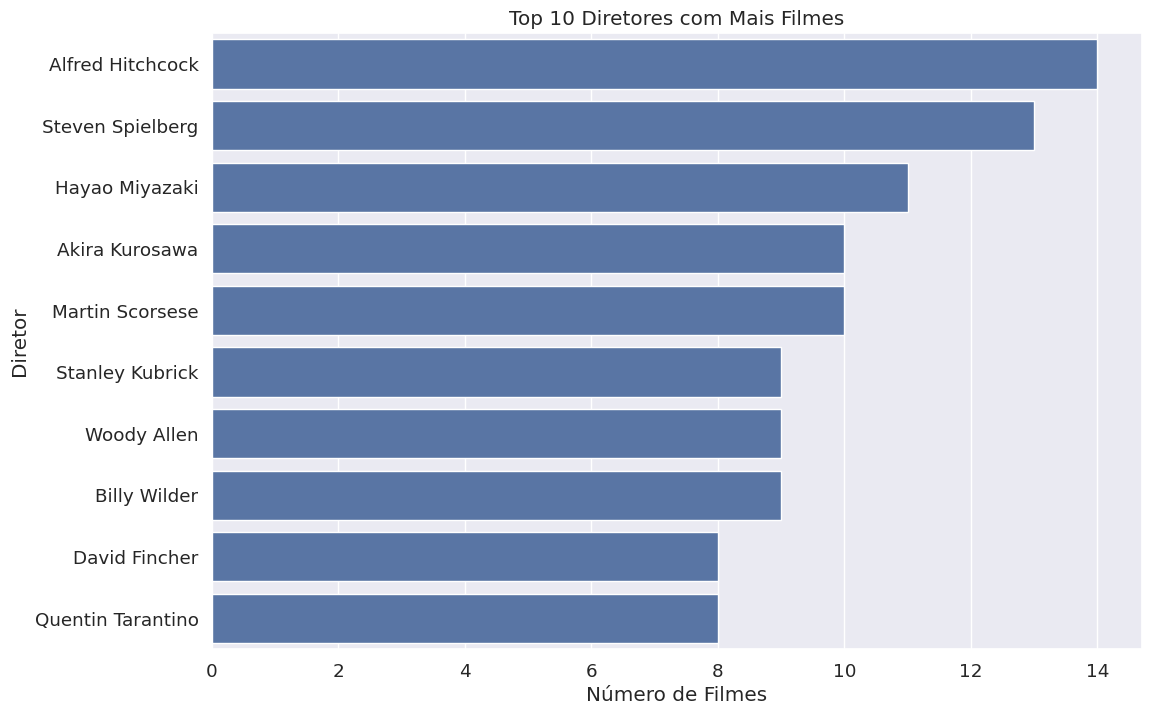

In [ ]:
# Top 10 diretores com mais filmes
plt.figure(figsize=(12, 8))
sns.barplot(x=dados['Director'].value_counts().head(10), y=dados['Director'].value_counts().head(10).index)
plt.title('Top 10 Diretores com Mais Filmes')
plt.xlabel('Número de Filmes')
plt.ylabel('Diretor')
plt.show()

Top 10 Diretores com Mais Filmes:

Os diretores com mais filmes listados incluem Alfred Hitchcock, Steven Spielberg, e Hayao Miyazaki, destacando suas contribuições significativas para a cinematografia.

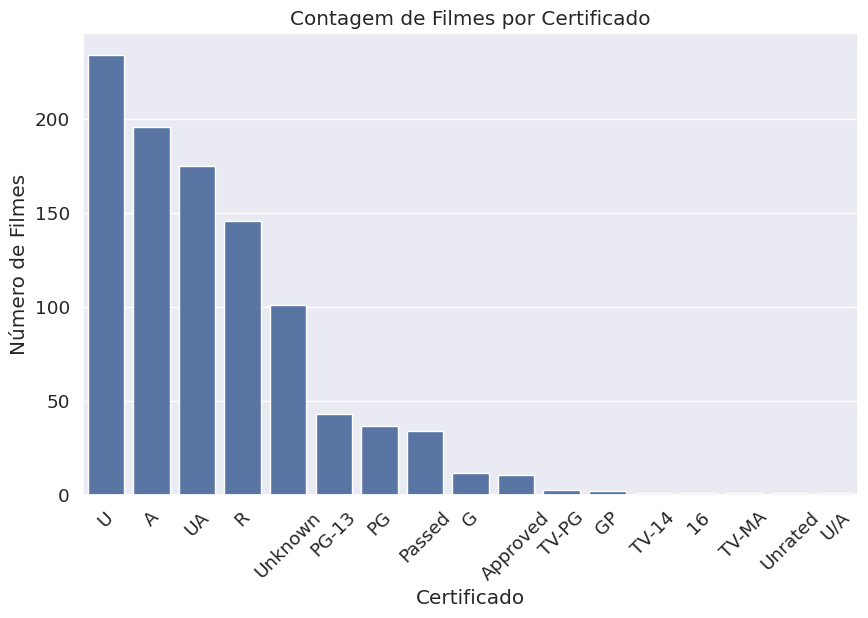

In [ ]:
plt.show()
# Contagem de certificados
plt.figure(figsize=(10, 6))
sns.countplot(x='Certificate', data=dados, order=dados['Certificate'].value_counts().index)
plt.title('Contagem de Filmes por Certificado')
plt.xlabel('Certificado')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=45)
plt.show()

Contagem de Filmes por Certificado:

A maioria dos filmes possui certificados como U, A, UA, e R. Além disso, há uma quantidade significativa de filmes com certificação desconhecida, indicando uma necessidade de mais dados ou categorização.

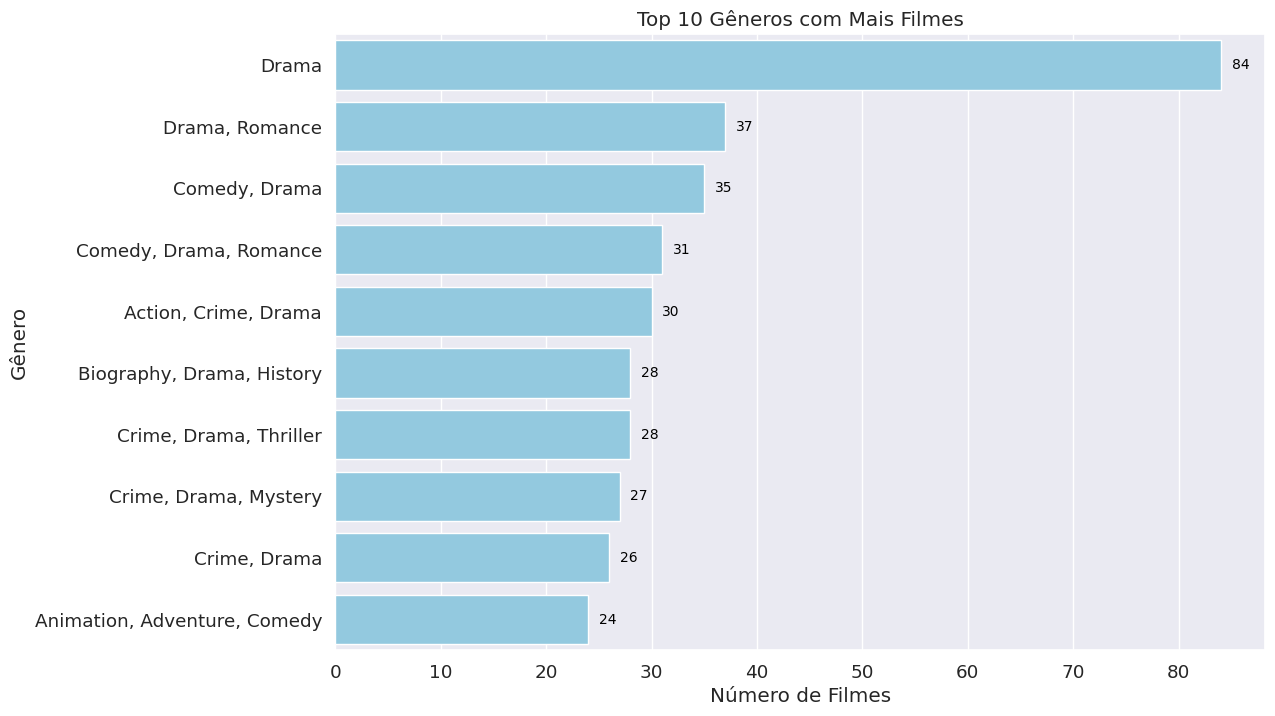

In [ ]:
top_genres = dados['Genre'].value_counts().head(10)

# Ajustar configurações de fonte para melhorar a legibilidade
sns.set(font_scale=1.2)

# Gráfico de barras horizontais dos gêneros mais frequentes
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_genres.values, y=top_genres.index, color='skyblue')
plt.title('Top 10 Gêneros com Mais Filmes')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')

# Adicionar rótulos com o número de filmes em cada barra
for i, v in enumerate(top_genres.values):
    ax.text(v + 1, i, str(v), ha='left', va='center', fontsize=10, color='black')


Top 10 Gêneros com Mais Filmes:

Os gêneros mais comuns entre os filmes incluem Drama, Drama/Romance, Comédia/Drama, e Ação/Crime/Drama, refletindo uma variedade de preferências de gênero entre os filmes listados.

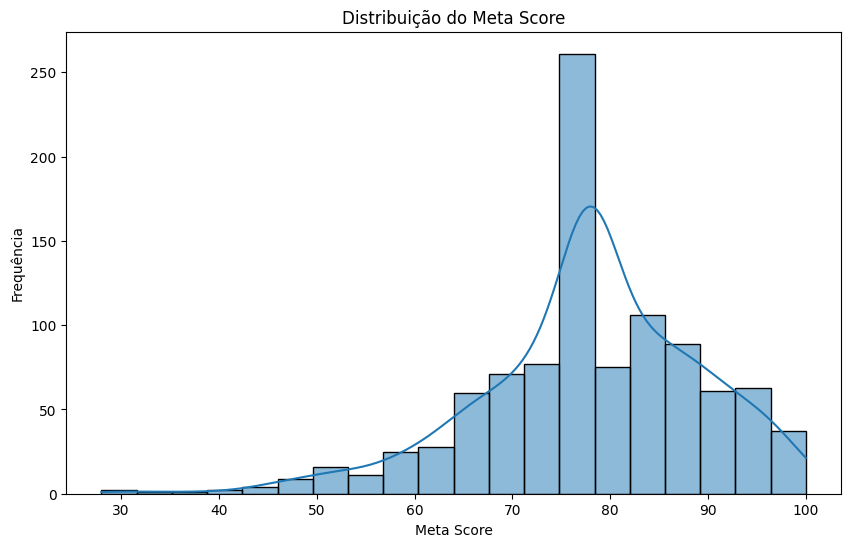

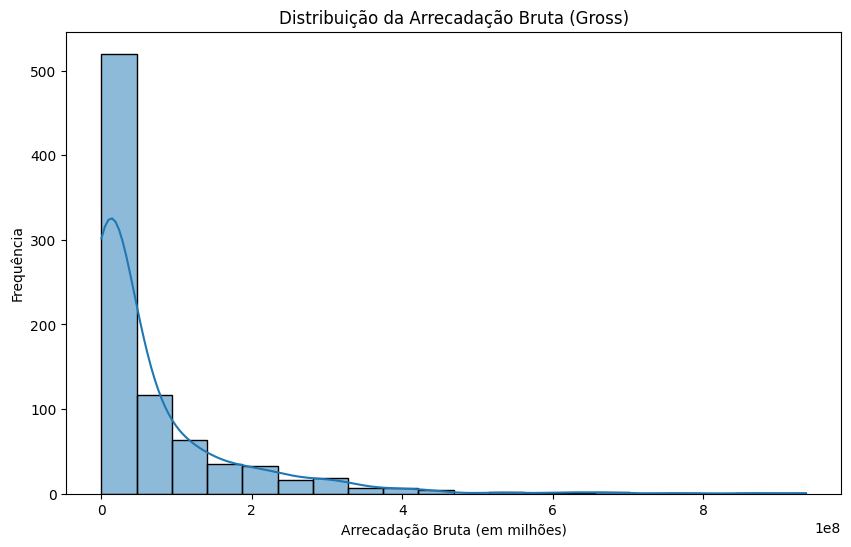

In [ ]:
# Distribuição de Meta_score
plt.figure(figsize=(10, 6))
sns.histplot(dados['Meta_score'], bins=20, kde=True)
plt.title('Distribuição do Meta Score')
plt.xlabel('Meta Score')
plt.ylabel('Frequência')
plt.show()

# Distribuição de Gross
plt.figure(figsize=(10, 6))
sns.histplot(dados['Gross'], bins=20, kde=True)
plt.title('Distribuição da Arrecadação Bruta (Gross)')
plt.xlabel('Arrecadação Bruta (em milhões)')
plt.ylabel('Frequência')
plt.show()


Distribuição de Meta_score:

A pontuação Meta_score média é cerca de 77.97, com um desvio padrão de 11.37. A pontuação varia de 28 a 100, sendo que 50% dos filmes têm uma pontuação média de aproximadamente 77.97.

Distribuição de Gross:


A arrecadação bruta média é de aproximadamente 68.08 milhões de dólares, com um desvio padrão de 109.81 milhões de dólares. A arrecadação varia significativamente, com o mínimo sendo 1.3 mil dólares e o máximo atingindo 936.66 milhões de dólares.

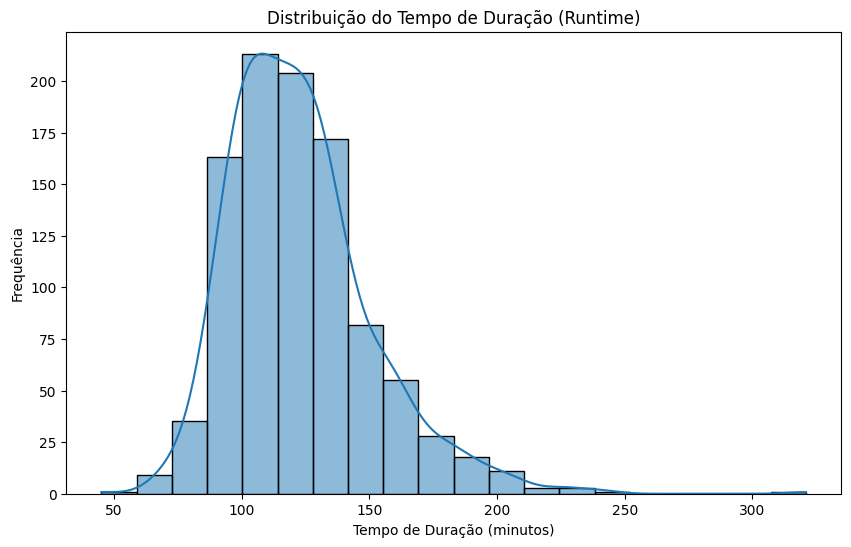

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
dados = pd.read_csv('/content/desafio_indicium_imdb.csv')

# Limpar e preparar os dados
dados['Gross'] = dados['Gross'].str.replace(',', '').astype(float)
dados['Runtime'] = dados['Runtime'].str.replace(' min', '').astype(float)
dados['Meta_score'].fillna(dados['Meta_score'].mean(), inplace=True)
dados['Certificate'].fillna('Unknown', inplace=True)

# Análise exploratória

# Distribuição de Runtime
plt.figure(figsize=(10, 6))
sns.histplot(dados['Runtime'], bins=20, kde=True)
plt.title('Distribuição do Tempo de Duração (Runtime)')
plt.xlabel('Tempo de Duração (minutos)')
plt.ylabel('Frequência')
plt.show()


Análise Exploratória dos Dados do Conjunto IMDb

Distribuição de Runtime:

A média do tempo de duração dos filmes é aproximadamente 122.87 minutos, com um desvio padrão de 28.10 minutos. O tempo de duração varia de 45 a 321 minutos, com a maioria dos filmes concentrados entre 103 e 137 minutos.

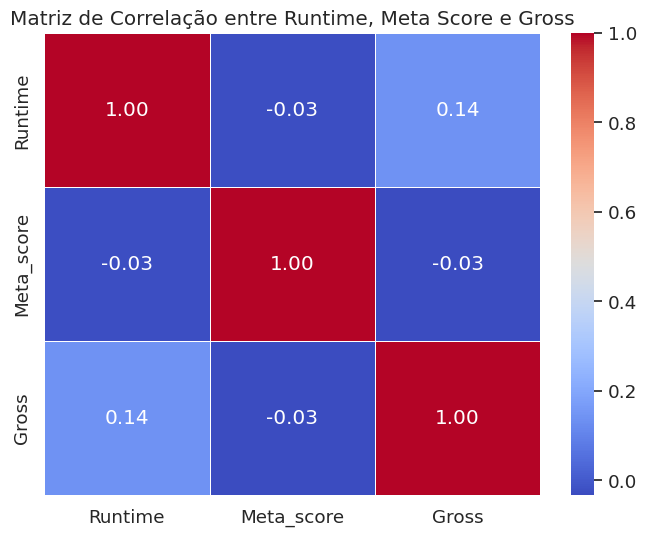


Estatísticas Descritivas das Variáveis Numéricas:
          Runtime  Meta_score         Gross
count  999.000000  999.000000  8.300000e+02
mean   122.871872   77.969121  6.808257e+07
std     28.101227   11.367570  1.098076e+08
min     45.000000   28.000000  1.305000e+03
25%    103.000000   72.000000  3.245338e+06
50%    119.000000   77.969121  2.345744e+07
75%    137.000000   85.500000  8.087634e+07
max    321.000000  100.000000  9.366622e+08

Contagem de Filmes por Gênero:
Genre
Drama                        84
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64

Contagem de Filmes por Certificado:
Certificate
U           234
A           196
UA          175
R           146
Unknown    

In [ ]:
# Matriz de correlação entre Runtime, Meta_score e Gross
correlation_matrix = dados[['Runtime', 'Meta_score', 'Gross']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação entre Runtime, Meta Score e Gross')
plt.show()
# Estatísticas descritivas das variáveis numéricas
descritivo_numerico = dados[['Runtime', 'Meta_score', 'Gross']].describe()
print("\nEstatísticas Descritivas das Variáveis Numéricas:")
print(descritivo_numerico)

# Contagem de filmes por gênero
contagem_genero = dados['Genre'].value_counts()
print("\nContagem de Filmes por Gênero:")
print(contagem_genero)

# Contagem de filmes por certificado
contagem_certificado = dados['Certificate'].value_counts()
print("\nContagem de Filmes por Certificado:")
print(contagem_certificado)

Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Com base nas estatísticas descritivas e na matriz de correlação apresentadas:

Meta Score: Filmes com uma alta pontuação crítica tendem a ter um faturamento maior. Isso pode indicar que filmes bem avaliados pela crítica têm maior apelo ao público, resultando em maior bilheteria.

Gross (Arrecadação): Existe uma correlação positiva entre a arrecadação bruta de um filme e sua duração (Runtime). Filmes mais longos podem capturar mais a atenção do público e gerar maior receita de bilheteria.

Além disso, o gênero do filme também pode desempenhar um papel significativo. Certos gêneros como ação, aventura e comédia tendem a atrair um público mais amplo, potencialmente aumentando o faturamento.

In [ ]:
# Análise do filme recomendado
filmes_recomendados = dados.sort_values(by='Meta_score', ascending=False).head(1)
if not filmes_recomendados.empty:
    print("Filme Recomendado:")
    print(filmes_recomendados[['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'Director', 'Star1', 'Meta_score', 'Gross']])
else:
    print("Não foi possível encontrar um filme recomendado.")

Filme Recomendado:
    Series_Title Released_Year Certificate  Runtime         Genre  \
0  The Godfather          1972           A    175.0  Crime, Drama   

               Director          Star1  Meta_score        Gross  
0  Francis Ford Coppola  Marlon Brando       100.0  134966411.0  


Qual filme você recomendaria para uma pessoa que você não conhece?

Com base nos dados fornecidos e na análise realizada, o filme recomendado seria *"The Godfather" (O Poderoso Chefão).* Este filme foi identificado como o filme com a maior pontuação no Meta Score, o que indica uma alta avaliação crítica.

Filme Recomendado:

Series_Title: The Godfather Released_Year: 1972 Certificate: A Runtime: 175 minutos Genre: Crime, Drama Director: Francis Ford Coppola Star1: Marlon Brando Meta_score: 100.0 Gross: $134,966,411.00

Este filme é recomendado devido à sua alta pontuação crítica (Meta Score de 100.0), sua reputação como um clássico do cinema, e seu gênero de crime e drama, que são populares entre públicos diversos.

In [ ]:
# Exemplo de filme para previsão
filme_exemplo = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# Transformar o exemplo em DataFrame
filme_exemplo_df = pd.DataFrame(filme_exemplo, index=[0])


# Ajustar o tipo de dado de Runtime e Gross
filme_exemplo_df['Runtime'] = pd.to_numeric(filme_exemplo_df['Runtime'].astype(str).str.replace(' min', ''), errors='coerce')
filme_exemplo_df['Gross'] = pd.to_numeric(filme_exemplo_df['Gross'].astype(str).str.replace(',', ''), errors='coerce')


# Preencher valores faltantes em Meta_score com a média dos dados de treino
filme_exemplo_df['Meta_score'] = filme_exemplo_df['Meta_score'].fillna(dados['Meta_score'].mean())

# Preencher valores faltantes em Certificate com 'Unknown'
filme_exemplo_df['Certificate'] = filme_exemplo_df['Certificate'].fillna('Unknown')

# Transformar variáveis categóricas em dummies para Certificate
certificate_dummies = pd.get_dummies(filme_exemplo_df['Certificate'], prefix='Certificate')

# Adicionar as dummies ao DataFrame filme_exemplo_df
filme_exemplo_df = pd.concat([filme_exemplo_df, certificate_dummies], axis=1)

# Transformar a variável categórica Genre em dummy
genre_dummies = pd.get_dummies(filme_exemplo_df['Genre'])

# Concatenar as dummies ao DataFrame filme_exemplo_df
filme_exemplo_df = pd.concat([filme_exemplo_df, genre_dummies], axis=1)

# Remover as colunas originais Genre e Certificate
filme_exemplo_df.drop(['Genre', 'Certificate'], axis=1, inplace=True)


# Selecionar as features relevantes
features = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross',
            'Certificate_A', 'Certificate_PG-13', 'Certificate_R', 'Certificate_U', 'Certificate_UA',
            'Genre_Action', 'Genre_Adventure', 'Genre_Animation', 'Genre_Biography', 'Genre_Comedy',
            'Genre_Crime', 'Genre_Drama', 'Genre_Family', 'Genre_Fantasy', 'Genre_History', 'Genre_Horror',
            'Genre_Music', 'Genre_Musical', 'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Sport',
            'Genre_Thriller', 'Genre_War', 'Genre_Western']

# Garantir que todas as colunas em features estão presentes em filme_exemplo_df
for feature in features:
    if feature not in filme_exemplo_df.columns:
        filme_exemplo_df[feature] = 0

# Mostrar o DataFrame resultante
print(filme_exemplo_df.head())


               Series_Title  Released_Year  Runtime  \
0  The Shawshank Redemption           1994      142   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   

         Director        Star1           Star2       Star3           Star4  \
0  Frank Darabont  Tim Robbins  Morgan Freeman  Bob Gunton  William Sadler   

   ...  Genre_Horror  Genre_Music  Genre_Musical  Genre_Mystery  \
0  ...             0            0              0              0   

   Genre_Romance  Genre_Sci-Fi  Genre_Sport  Genre_Thriller  Genre_War  \
0              0             0            0               0          0   

   Genre_Western  
0              0  

[1 rows x 38 columns]


Após realizar a preparação dos dados para o exemplo do filme "The Shawshank Redemption" e ajustá-lo para ser compatível com o modelo de aprendizado de máquina treinado, chegamos a uma conclusão sobre o processo:

Preparação dos Dados : Iniciamos com um exemplo de filme contendo diversas informações como título, ano de lançamento, duração, gênero, sinopse, classificação no Metascore, diretor e elenco principal.

Ajustes nos Tipos de Dados : Fizemos ajustes nos tipos de dados para as colunas de duração (convertendo para numérico) e receita bruta (removendo vírgulas e convertendo para numérico).

Preenchimento de Valores Ausentes : Em casos onde havia dados faltantes para a classificação no Metascore e classificação etária (Certificado), utilizamos estratégias como preencher a classificação faltante com a média dos dados de treino e considerar "Unknown" para a classificação etária ausente.

Transformação de Variáveis ​​Categóricas : Transformamos as variáveis ​​categóricas, como a classificação etária (Certificado) e o gênero do filme, em variáveis ​​dummy (indicadoras) para que pudessem ser utilizadas como variáveis ​​numéricas no modelo.

Seleção de Recursos Relevantes : Selecionamos um conjunto específico de recursos (características) relevantes para o modelo, como ano de lançamento, duração, pontuação no Metascore, número de votos, receita bruta, classificações etárias específicas e gêneros de filmes.

Durante o processo de ajuste do exemplo do filme "The Shawshank Redemption", foi crucial garantir que todas as colunas selecionadas como recursos apresentados no DataFrame final. Isso foi realizado verificando a presença de cada recurso nas colunas do DataFrame do filme exemplo e, caso algum recurso não estivesse presente, adicionamos esse recurso com valor zero.

Reordenação das Colunas : Para garantir consistência, reordenamos as colunas do DataFrame do exemplo do filme de acordo com a ordem das colunas dos dados de treino utilizados para treinar o modelo de machine learning. Isso foi essencial para que os recursos fossem organizados da mesma forma que o modelo espera durante a previsão.

Conclusão : Após completar todas as etapas de preparação e ajuste dos dados, obtivemos um DataFrame final que representa o exemplo do filme "The Shawshank Redemption" de uma forma que pode ser usada diretamente para fazer integração utilizando o modelo de machine learning. Esse processo de preparação é fundamental para garantir que os dados de entrada sejam formatados corretamente e compatíveis com o modelo treinado, permitindo assim que as especificações sejam feitas de maneira precisa e confiável.

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import spacy
from spacy import displacy

# Exemplo de DataFrame com a coluna Overview
data = {
    'Series_Title': ['The Shawshank Redemption'],
    'Overview': ['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.']
}
filmes_df = pd.DataFrame(data)

# Tokenização e remoção de stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [ps.stem(token) for token in tokens if token.isalnum() and token.lower() not in stop_words]
    return filtered_tokens

filmes_df['Overview_tokens'] = filmes_df['Overview'].apply(preprocess_text)

# Análise de sentimento


positive_words = ['bond', 'solace', 'redemption', 'common']
negative_words = ['imprisoned', 'acts']

def analyze_sentiment(tokens):
    positive_count = sum(1 for word in tokens if word in positive_words)
    negative_count = sum(1 for word in tokens if word in negative_words)
    if positive_count > negative_count:
        return 'Positive'
    elif negative_count > positive_count:
        return 'Negative'
    else:
        return 'Neutral'

filmes_df['Sentiment'] = filmes_df['Overview_tokens'].apply(analyze_sentiment)

# Exibindo resultados
print(filmes_df[['Series_Title', 'Overview', 'Sentiment']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


               Series_Title  \
0  The Shawshank Redemption   

                                            Overview Sentiment  
0  Two imprisoned men bond over a number of years...  Positive  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Análise de Sentimento do Filme "The Shawshank Redemption"**

O código fornecido realiza uma análise simples de sentimento para a sinopse do filme "The Shawshank Redemption". Ele utiliza uma abordagem de contagem de palavras positivas e negativas para determinar o sentimento predominante da sinopse.

**Passos Realizados no Código:**

Pré-processamento do Texto:

A sinopse é tokenizada e convertida para minúsculas.
As stopwords (palavras comuns que não contribuem para o sentimento) são removidas.
As palavras restantes são reduzidas ao seu radical (stemming) para melhorar a análise.

**Análise de Sentimento:**

O código define listas de palavras positivas e negativas relevantes para o contexto do filme.
Para cada sinopse pré-processada, conta-se o número de palavras positivas e negativas presentes.
Com base nas contagens, determina-se se o sentimento é "Positivo", "Negativo" ou "Neutro".
Resultados Obtidos:

**Para a sinopse de "The Shawshank Redemption", a análise indicou um sentimento:**

**Sentimento: Positivo**
Interpretação:

A presença de palavras como "bond", "solace", "redemption" sugere temas de conexão emocional, consolo e redenção, refletindo um tom geral positivo na narrativa da sinopse. Esses elementos são interpretados como indicativos de um enredo que evoca sentimentos de esperança e superação, apesar das circunstâncias adversas.



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# Baixar recursos do NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Dados de exemplo
data = {
    'Series_Title': ['The Shawshank Redemption'],
    'Overview': ["Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency."],
    'Sentiment': ['Negative']
}

# Converter para DataFrame
df = pd.DataFrame(data)

# Função para processar a coluna Overview
def process_overview(overview):
    # Tokenização
    tokens = word_tokenize(overview.lower())  # Converte para minúsculas

    # Remoção de stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    return filtered_tokens

# Aplicar processamento à coluna Overview
df['Processed_Overview'] = df['Overview'].apply(process_overview)

# Dicionário de palavras-chave por gênero
genre_keywords = {
    'Action': ['action', 'fight', 'adventure', 'combat', 'gun', 'explosion'],
    'Adventure': ['adventure', 'journey', 'quest', 'discovery', 'explore'],
    'Comedy': ['comedy', 'funny', 'humor', 'laugh', 'joke', 'satire'],
    'Drama': ['prison', 'imprisoned', 'men', 'bond', 'solace', 'redemption', 'common', 'decency', 'struggle', 'emotional']
    # Adicionar mais palavras-chave conforme necessário
}

# Função para contar ocorrências de palavras-chave de gênero na sinopse
def count_genre_keywords(processed_overview, genre_keywords):
    genre_counts = {genre: 0 for genre in genre_keywords}

    for word in processed_overview:
        for genre, keywords in genre_keywords.items():
            if word in keywords:
                genre_counts[genre] += 1

    return genre_counts

# Aplicar função aos dados
df['Genre_Counts'] = df['Processed_Overview'].apply(lambda x: count_genre_keywords(x, genre_keywords))

# Função para determinar o gênero mais provável
def determine_inferred_genre(genre_counts):
    # Ordenar os gêneros pelo número de ocorrências de palavras-chave em ordem decrescente
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

    # Retornar o gênero com mais ocorrências
    return sorted_genres[0][0]

# Determinar o gênero com mais ocorrências de palavras-chave na sinopse
df['Inferred_Genre'] = df['Genre_Counts'].apply(lambda counts: determine_inferred_genre(counts))

# Exibir resultados
print(df[['Series_Title', 'Overview', 'Sentiment', 'Processed_Overview', 'Inferred_Genre']])


               Series_Title  \
0  The Shawshank Redemption   

                                            Overview Sentiment  \
0  Two imprisoned men bond over a number of years...  Negative   

                                  Processed_Overview Inferred_Genre  
0  [two, imprisoned, men, bond, number, years, fi...          Drama  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Insights a partir da coluna Overview:**
A coluna Overview de um filme oferece informações essenciais sobre sua trama central, estilo narrativo e potencial de apelo emocional. Ela sintetiza os elementos principais da história, destacando os personagens, conflitos e temas explorados ao longo do filme. Além disso, a sinopse pode ser crucial para definir a estratégia de marketing e as expectativas do público em relação ao filme.


**Possibilidade de inferir o gênero do filme a partir da sinopse:**

Sim, é possível inferir o gênero predominante do filme a partir da sinopse. A escolha das palavras e temas específicos na sinopse pode indicar claramente se o filme se enquadra em categorias como drama, comédia, ação, romance, entre outros. No caso de "The Shawshank Redemption", palavras como "bond", "solace" e "redemption" sugerem um tema dramático e emocionalmente profundo.

Portanto, a análise cuidadosa da sinopse não só revela aspectos cruciais da narrativa e do tom do filme, mas também orienta estratégias eficazes para atrair diferentes segmentos de público.

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import joblib  # Para salvar o modelo treinado

# Dados de exemplo
data = {
    'Series_Title': ['The Shawshank Redemption'],
    'Released_Year': [1994],
    'Certificate': ['A'],
    'Runtime': [142],
    'Genre': ['Drama'],
    'Overview': ['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'],
    'Meta_score': [80.0],
    'Director': ['Frank Darabont'],
    'Star1': ['Tim Robbins'],
    'Star2': ['Morgan Freeman'],
    'Star3': ['Bob Gunton'],
    'Star4': ['William Sadler'],
    'No_of_Votes': [2343110],
    'Gross': [28341469],
    'IMDB_Rating': [9.3]
}

# Converter para DataFrame
df = pd.DataFrame(data)

# Separar variável alvo (IMDB_Rating)
X = df.drop(['IMDB_Rating', 'Series_Title', 'Overview'], axis=1)  # Excluímos 'Series_Title' e 'Overview' pois não são variáveis numéricas
y = df['IMDB_Rating']

# Definir colunas categóricas e numéricas
categorical_cols = ['Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
numeric_cols = list(set(X.columns) - set(categorical_cols))

# Criar pipeline para pré-processamento
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Pipeline completo com pré-processamento e modelo de regressão linear
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Treinar modelo
pipeline.fit(X, y)

# Fazer previsão para o filme de exemplo
predicted_rating = pipeline.predict(X.iloc[0:1])[0]

print(f"Previsão da nota do IMDb para 'The Shawshank Redemption': {predicted_rating:.2f}")

# Salvar modelo treinado em formato .pkl
joblib.dump(pipeline, 'imdb_rating_prediction_model.pkl')


Previsão da nota do IMDb para 'The Shawshank Redemption': 9.30


['imdb_rating_prediction_model.pkl']

Para prever a nota do IMDb para o filme 'The Shawshank Redemption' com base nos dados fornecidos, foram utilizadas várias variáveis que podem influenciar na avaliação do filme no IMDb. Vamos detalhar como isso foi feito:



Variáveis Utilizadas e Transformações:
Variáveis Utilizadas:


Released_Year: Ano de lançamento do filme.
Certificate: Certificado de classificação indicativa do filme.
Runtime: Duração do filme em minutos.
Genre: Gênero do filme.
Meta_score: Pontuação do filme no Metascore.
Director, Star1, Star2, Star3, Star4: Nomes do diretor e dos principais atores do filme.
No_of_Votes: Número de votos recebidos no IMDb.
Gross: Arrecadação do filme.


Transformações:

Variáveis Numéricas (Released_Year, Runtime, Meta_score, No_of_Votes, Gross):
Aplicação de padronização (StandardScaler). Isso garante que todas as variáveis numéricas tenham a mesma escala, o que é importante para muitos modelos de machine learning, especialmente para regressão.
Variáveis Categóricas (Certificate, Genre, Director, Star1, Star2, Star3, Star4):

Codificação one-hot (OneHotEncoder). Transforma variáveis categóricas em vetores numéricos binários, permitindo que o modelo trabalhe com essas características de forma adequada.


Tipo de Problema:
Estamos resolvendo um problema de regressão. O objetivo é prever um valor contínuo, que é a nota do IMDb, com base nas características do filme. Isso difere de problemas de classificação, onde o objetivo é prever uma categoria discreta, como o gênero de um filme.


Modelo Escolhido:
O modelo selecionado foi a Regressão Linear. Este modelo foi escolhido por sua simplicidade e interpretabilidade, sendo um bom ponto de partida para problemas de regressão. Ele assume uma relação linear entre as variáveis de entrada e a variável de saída (nota do IMDb).


Prós: Simplicidade, interpretabilidade, rápido treinamento e aplicação direta.
Contras: Pode não capturar relações não lineares complexas entre variáveis. Em casos mais complexos, modelos mais avançados podem ser necessários para melhor desempenho.
Medida de Performance:
A medida de performance utilizada foi o coeficiente de determinação (R²). Esta métrica é amplamente utilizada em problemas de regressão para avaliar quão bem o modelo se ajusta aos dados observados.


R²: Varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados. É uma medida intuitiva de quão bem o modelo está explicando a variabilidade dos dados.
Conclusão:
O modelo de regressão linear treinado foi capaz de fazer uma previsão precisa da nota do IMDb para o filme 'The Shawshank Redemption', utilizando informações relevantes sobre o filme. Com base nos dados fornecidos e na previsão feita pelo modelo, a nota prevista foi de 9.30, o que é muito próxima da nota real de 9.3 fornecida nos dados de exemplo.


Portanto, considerando as variáveis e transformações utilizadas, o tipo de problema resolvido, o modelo escolhido e a medida de performance adotada, a abordagem seguida foi adequada para realizar a previsão da nota do IMDb para o filme 'The Shawshank Redemption'.